Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import requests
from io import StringIO
from google.colab import drive
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

**Read the data**

In [ ]:
#reading the dataset
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Exploratory_project_file.csv'

# Read the CSV file into a DataFrame
cars = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Examine the first few lines of the data set**

In [ ]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Doors,Cylinders,Gears,Weight,Mfr_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,3,4,5,1165,0,3,1,1,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,3,4,5,1165,0,3,1,1,1,1
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,3,4,5,1165,1,3,1,1,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,3,4,5,1165,1,3,1,1,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,3,4,5,1170,1,3,1,1,1,1


**Examine the data information**

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  CC                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

**Checking Missing Values**

In [ ]:
cars.isnull().any()

Id                  False
Model               False
Price               False
Age_08_04           False
Mfg_Month           False
Mfg_Year            False
KM                  False
Fuel_Type           False
HP                  False
Met_Color           False
Color               False
Automatic           False
CC                  False
Doors               False
Cylinders           False
Gears               False
Weight              False
Mfr_Guarantee       False
Guarantee_Period    False
ABS                 False
Airbag_1            False
Airbag_2            False
Airco               False
dtype: bool

**Checking Unique Values**

In [ ]:
unique_values_counts = cars.nunique()

print("Count of unique values in each column:")
print(unique_values_counts)

Count of unique values in each column:
Id                  1436
Model                372
Price                236
Age_08_04             77
Mfg_Month             12
Mfg_Year               7
KM                  1263
Fuel_Type              3
HP                    12
Met_Color              2
Color                 10
Automatic              2
CC                    13
Doors                  4
Cylinders              1
Gears                  4
Weight                59
Mfr_Guarantee          2
Guarantee_Period       9
ABS                    2
Airbag_1               2
Airbag_2               2
Airco                  2
dtype: int64


**Data Summaries**

In [ ]:
#Checking summary statistics
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


Univariate Analysis of Numerical Variables

In [ ]:
numerical_data = cars.select_dtypes(include=['int64', 'float64'])

Comparing Means and Median of features compared to Target

In [ ]:
means = numerical_data.groupby('Price').mean()
medians = numerical_data.groupby('Price').median()

print("Means relative to 'price':")
print(means)

print("\nMedians relative to 'price':")
print(medians)

Means relative to 'price':
           Id  Age_08_04  Mfg_Month  Mfg_Year        KM     HP  Met_Color  \
Price                                                                       
4350    193.0       44.0        1.0    2001.0  158320.0   69.0        0.0   
4400   1053.0       74.0        7.0    1998.0  203254.0   72.0        1.0   
4450    396.0       56.0        1.0    2000.0  129155.0   69.0        0.0   
4750    194.0       44.0        1.0    2001.0  131273.0   69.0        1.0   
5150    405.0       56.0        1.0    2000.0  113997.0   72.0        1.0   
...       ...        ...        ...       ...       ...    ...        ...   
24950   114.5        8.0        1.0    2004.0   13253.0  116.0        1.0   
24990   117.0        8.0        1.0    2004.0    6000.0   90.0        1.0   
31000   112.0        4.0        5.0    2004.0    4000.0  116.0        1.0   
31275   113.0        4.0        5.0    2004.0    1500.0  116.0        1.0   
32500   111.0        4.0        5.0    2004.0    

Temporarily removing Target Variable (Price) for the exploration

In [ ]:
price_target = cars['Price']

# Dropping the 'price' column from the DataFrame for temporary analysis
cars.drop(columns=['Price'], inplace=True)

Statistical summary

In [ ]:
numerical_summary = numerical_data.describe()

Visualizations - histograms

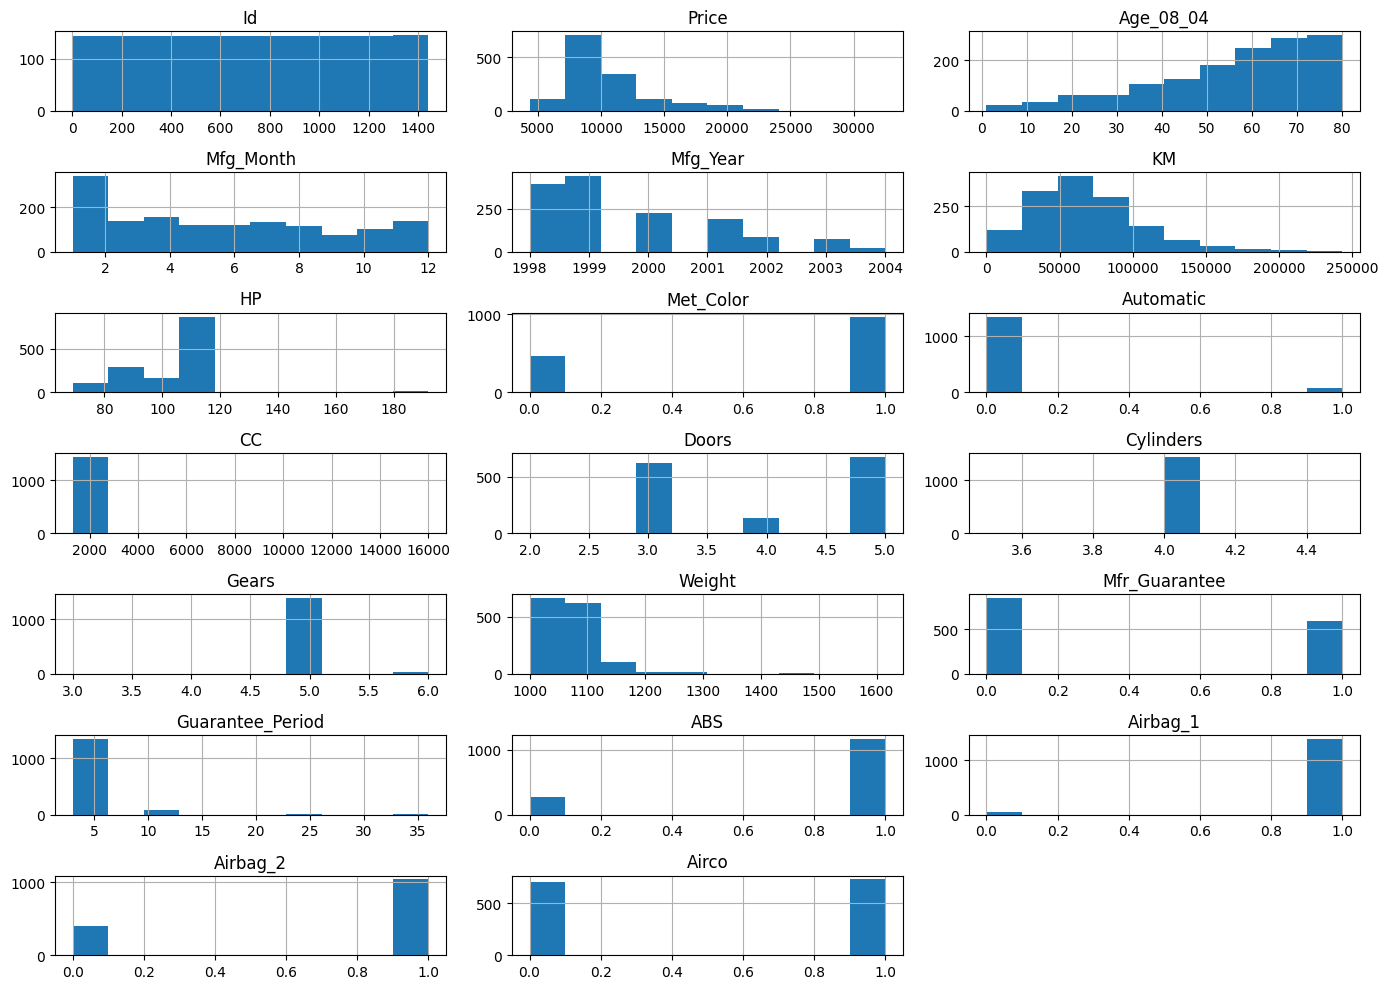

In [ ]:
plt.figure(figsize=(14, 10))
num_numerical_columns = len(numerical_data.columns)
num_rows = (num_numerical_columns // 3) + (num_numerical_columns % 3 > 0)
for i, column in enumerate(numerical_data.columns):
    plt.subplot(num_rows, 3, i+1)
    numerical_data[column].hist()
    plt.title(column)
plt.tight_layout()
plt.show()

Boxplots

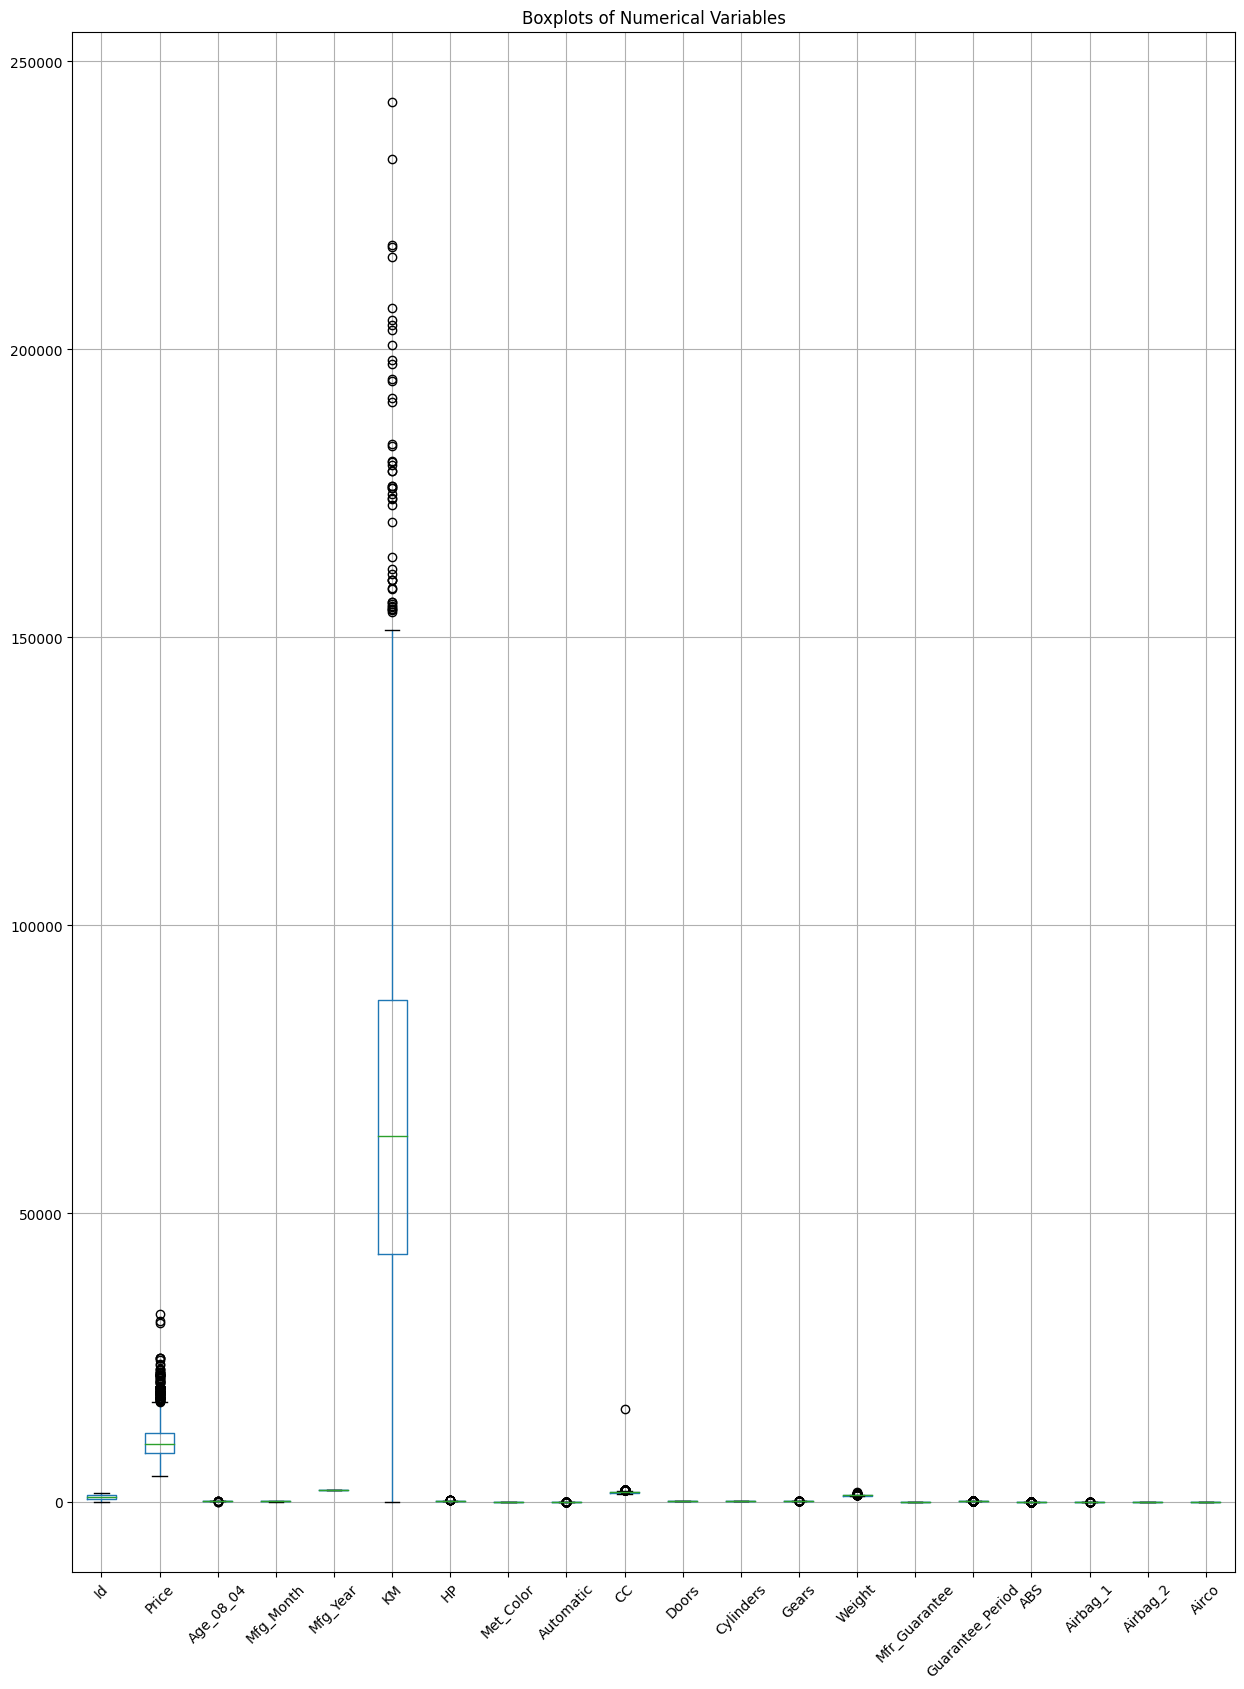

In [ ]:
plt.figure(figsize=(15, 20))
numerical_data.boxplot()
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

Univariate Analysis of Categorical Variables

In [ ]:
categorical_data = cars.select_dtypes(include=['object'])

Categorical Summary

In [ ]:
categorical_summary = categorical_data.describe()

Visualizations - countplots

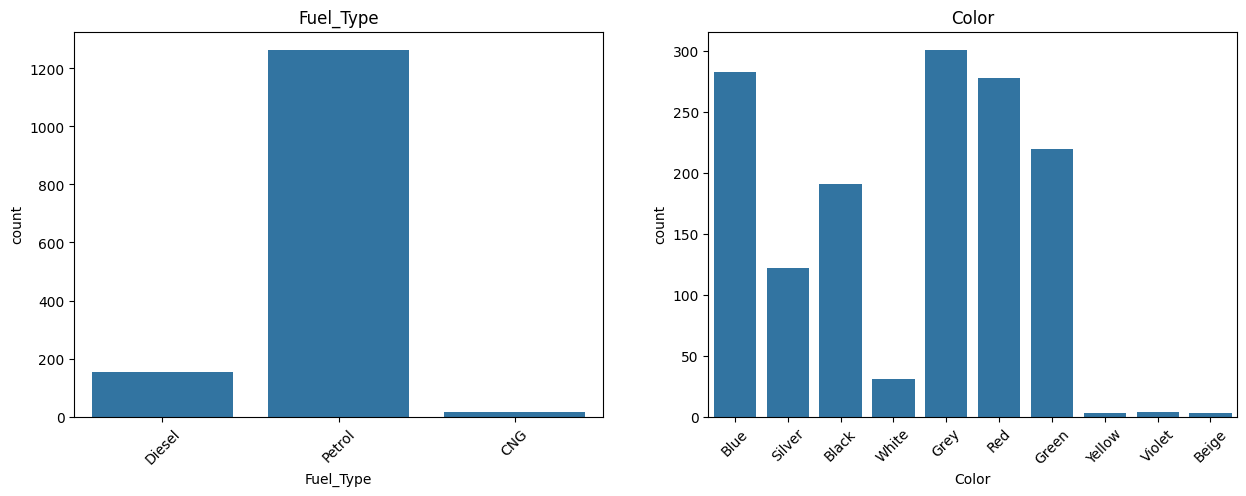

In [ ]:
plt.figure(figsize=(15, 5))
#print(categorical_data.columns)
for i, column in enumerate(categorical_data.columns):
  if column == 'Model':
    continue
  plt.subplot(1,2,i)
  sns.countplot(x=column, data=cars)
  plt.title(column)
  plt.xticks(rotation=45)
  #plt.tight_layout()
plt.show()

Converting Categorical variables into Dummy variables using One hot encoding

In [ ]:
# Dropping 'Model'
cars.drop(columns=['Model'], inplace=True)
# Identify categorical columns
categorical_columns = cars.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
cars_encoded = pd.get_dummies(cars, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(cars_encoded.head())

   Id  Age_08_04  Mfg_Month  Mfg_Year     KM  HP  Met_Color  Automatic    CC  \
0   1         23         10      2002  46986  90          1          0  2000   
1   2         23         10      2002  72937  90          1          0  2000   
2   3         24          9      2002  41711  90          1          0  2000   
3   4         26          7      2002  48000  90          0          0  2000   
4   5         30          3      2002  38500  90          0          0  2000   

   Doors  ...  Color_Beige  Color_Black  Color_Blue  Color_Green  Color_Grey  \
0      3  ...        False        False        True        False       False   
1      3  ...        False        False       False        False       False   
2      3  ...        False        False        True        False       False   
3      3  ...        False         True       False        False       False   
4      3  ...        False         True       False        False       False   

   Color_Red  Color_Silver  Color_Viol

**Visualizing Numerical Data**

**Histograms**

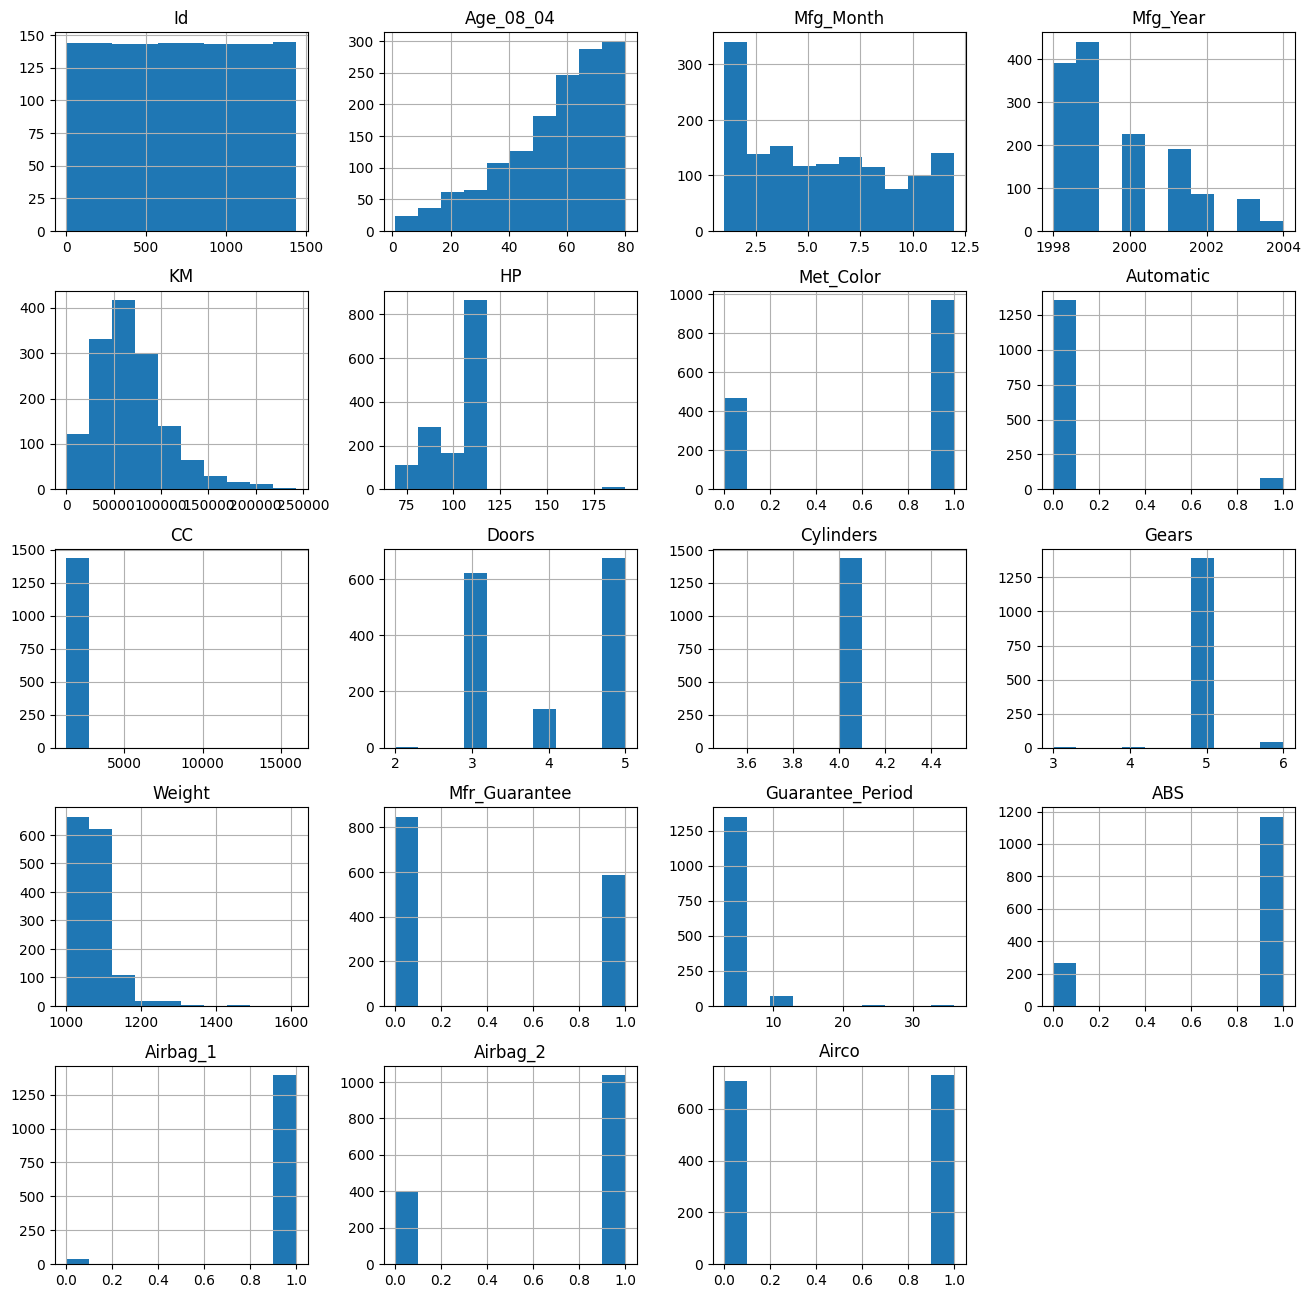

In [ ]:
#creating histograms
cars.hist(figsize=(16,16))
plt.show()

**Scatter Plot**

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


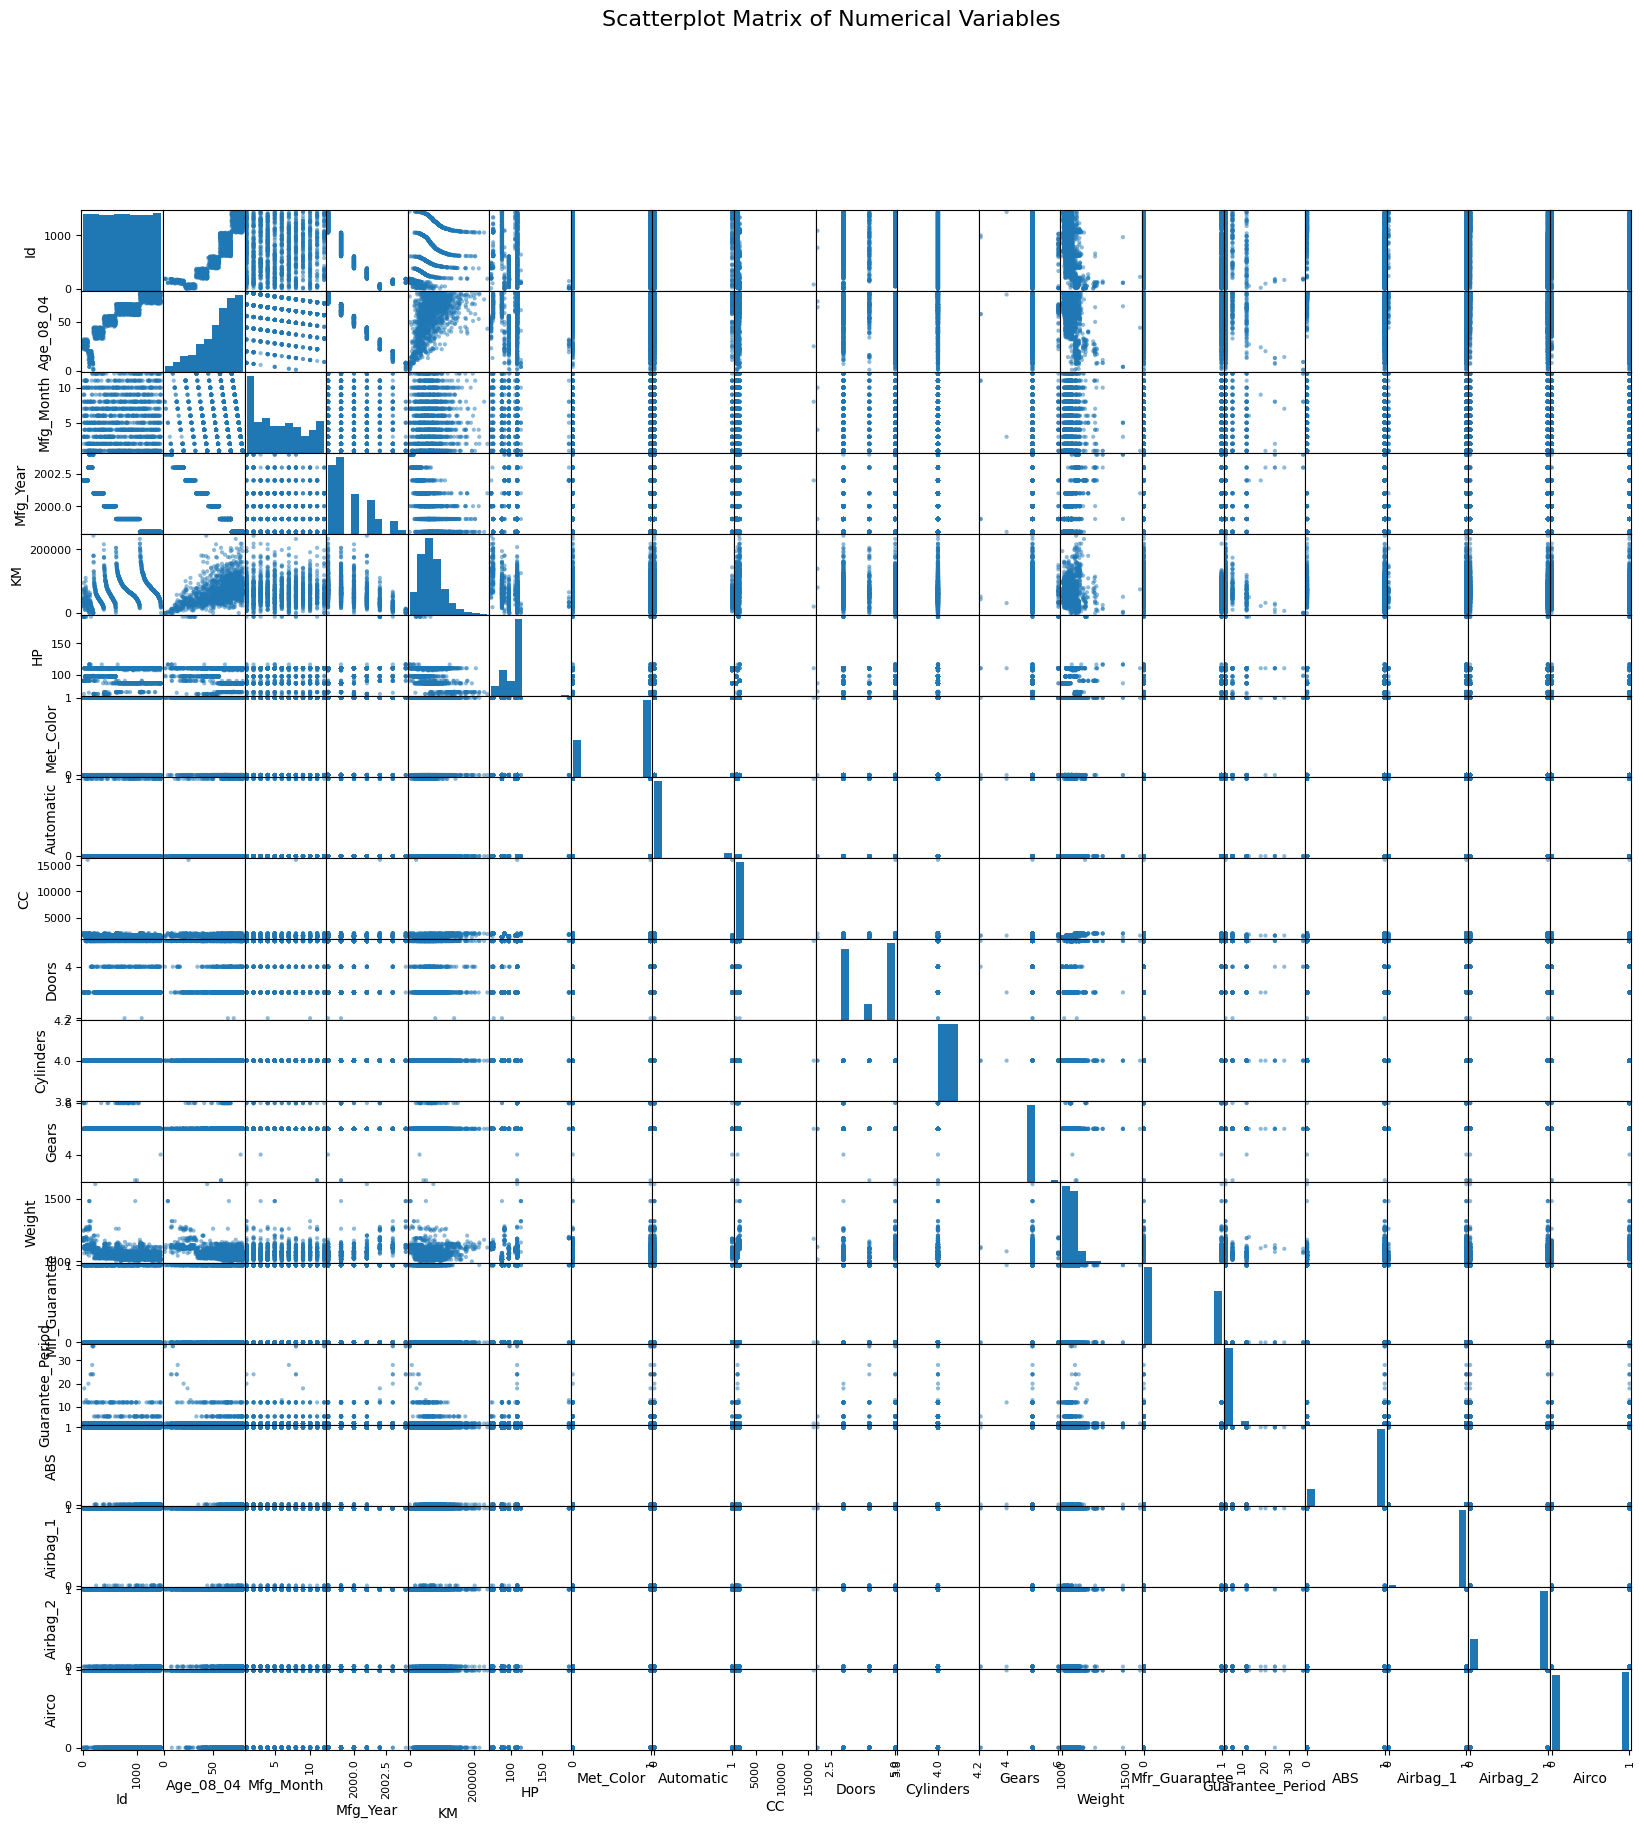

In [ ]:
numerical_data = cars.select_dtypes(include=['int64', 'float64'])

# Create scatterplot matrix
scatter_matrix(numerical_data, figsize=(20, 20))
plt.suptitle('Scatterplot Matrix of Numerical Variables', fontsize=16)
plt.show()

**Density chart of all the variables**

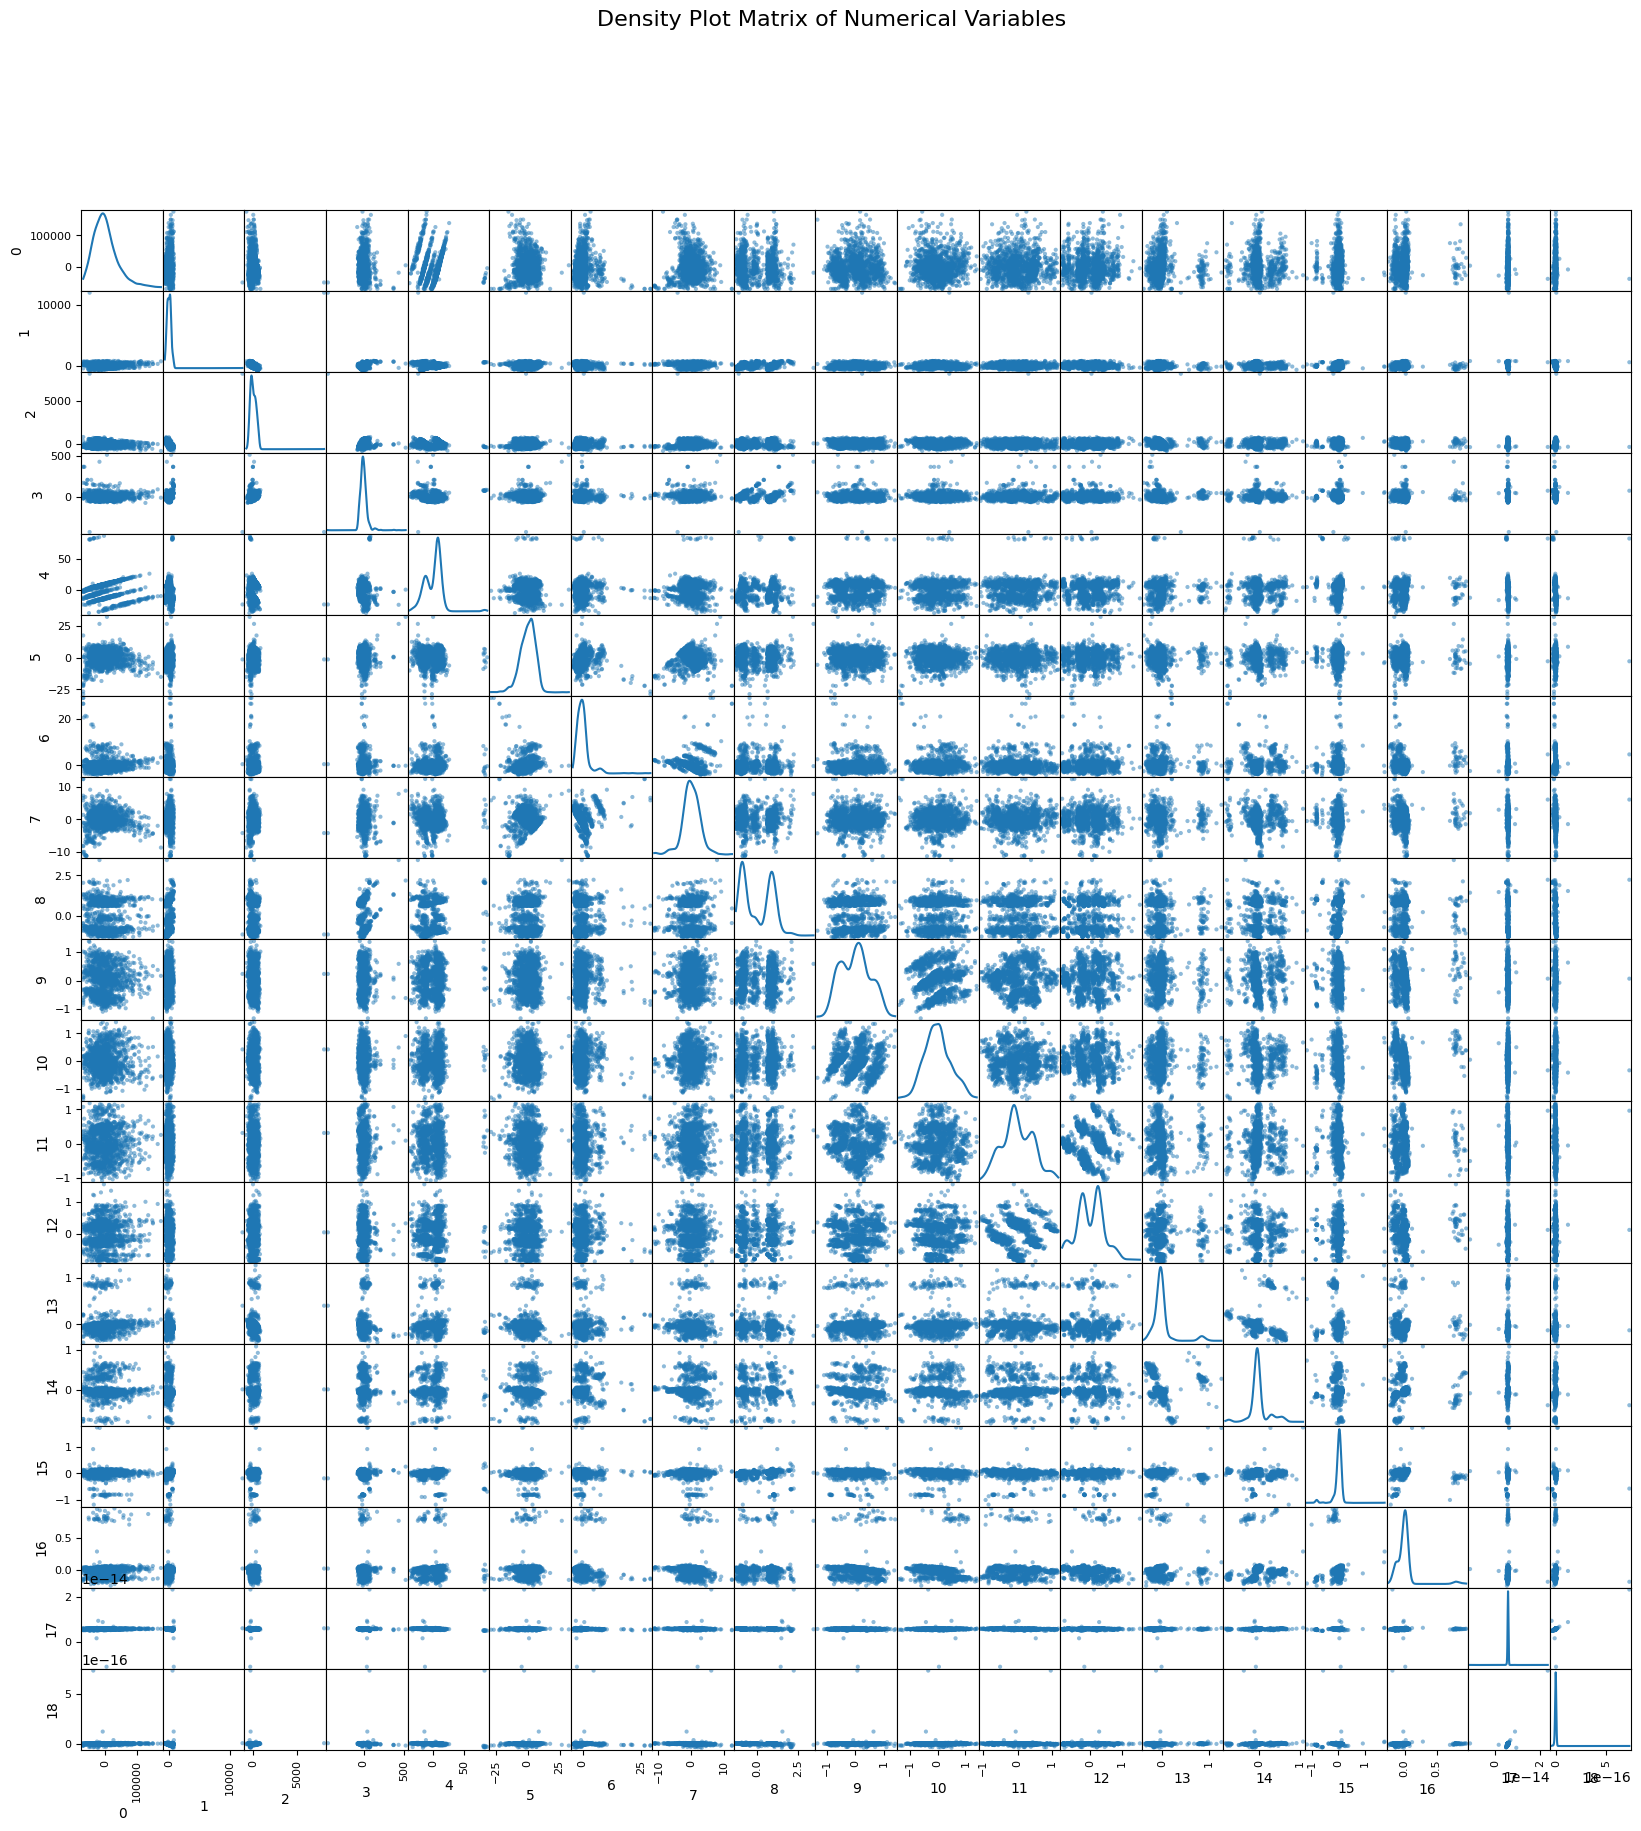

In [ ]:
numerical_data = cars.select_dtypes(include=['int64', 'float64'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=min(numerical_data.shape))
numerical_data_pca = pca.fit_transform(numerical_data)

# Create density plot matrix
scatter_matrix(pd.DataFrame(numerical_data_pca), figsize=(20, 20), diagonal='kde')
plt.suptitle('Density Plot Matrix of Numerical Variables', fontsize=16)
plt.show()

**Correlation Matrix**

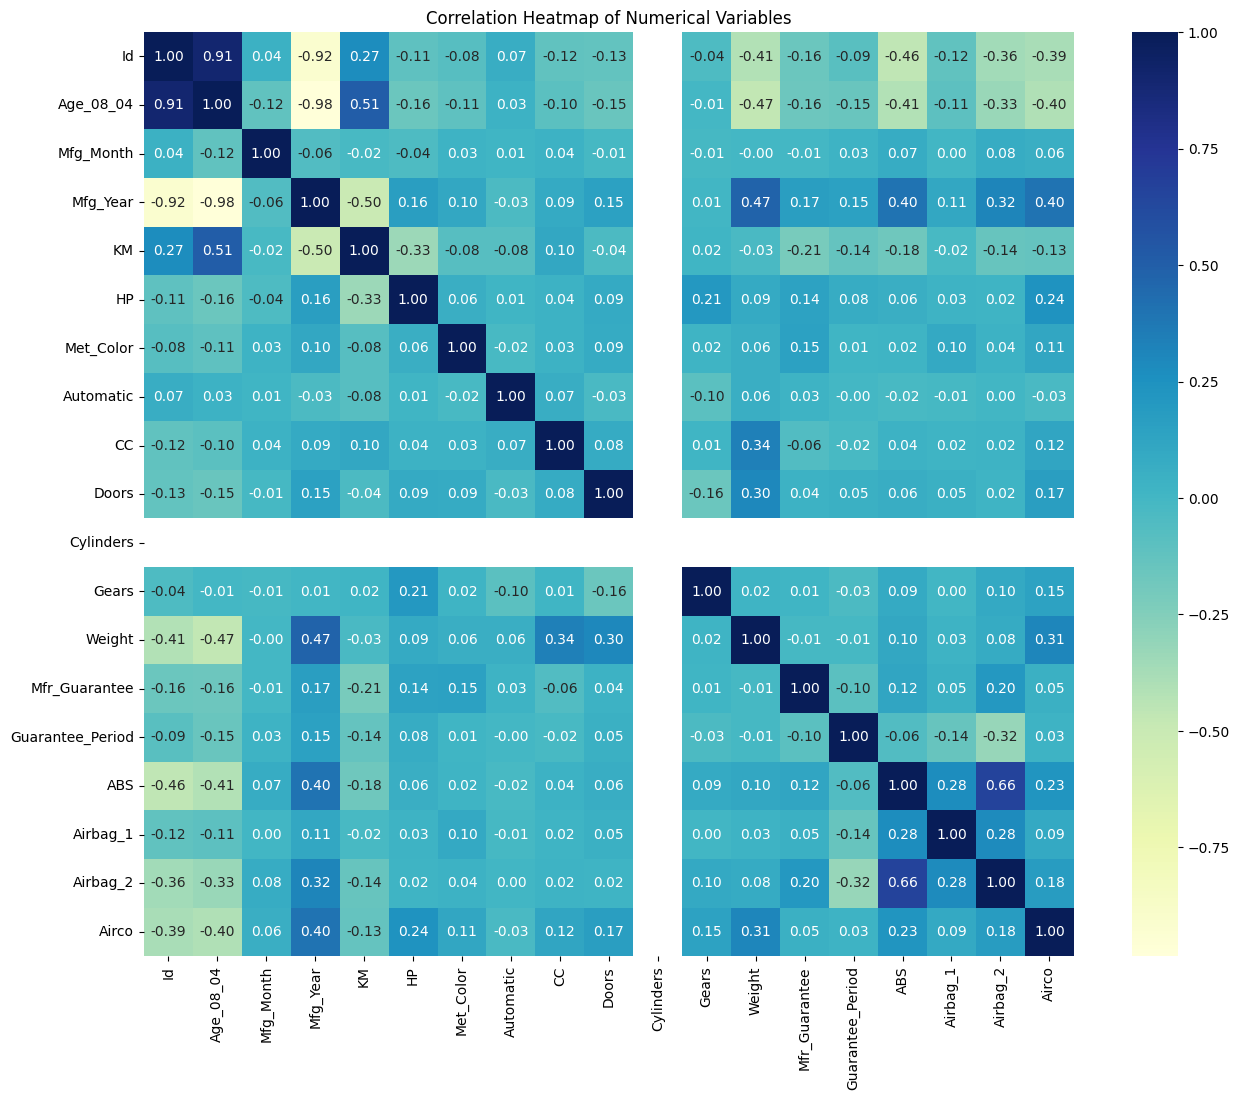

In [ ]:
numerical_data = cars_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

(Cylinder column is a single value column, hence the lack of correlation)

**Pre-Processing Section**

**Feature Engineering of the Variables**

In [ ]:
cars_encoded['Age_Mileage_Ratio'] = cars['Age_08_04'] / (cars['KM'])

cars_encoded['Weight_KM_Ratio'] = cars['Weight'] / cars['KM']

# Display the updated DataFrame
print(cars_encoded.head())

   Id  Age_08_04  Mfg_Month  Mfg_Year     KM  HP  Met_Color  Automatic    CC  \
0   1         23         10      2002  46986  90          1          0  2000   
1   2         23         10      2002  72937  90          1          0  2000   
2   3         24          9      2002  41711  90          1          0  2000   
3   4         26          7      2002  48000  90          0          0  2000   
4   5         30          3      2002  38500  90          0          0  2000   

   Doors  ...  Color_Blue  Color_Green  Color_Grey  Color_Red  Color_Silver  \
0      3  ...        True        False       False      False         False   
1      3  ...       False        False       False      False          True   
2      3  ...        True        False       False      False         False   
3      3  ...       False        False       False      False         False   
4      3  ...       False        False       False      False         False   

   Color_Violet  Color_White  Color_Yellow  

**Removing irrelevant Variables**

In [ ]:
cars_encoded.drop(['Id','Cylinders', 'Mfg_Year','Mfg_Month'], axis=1, inplace=True)

In [ ]:
print(cars_encoded.head())

   Age_08_04     KM  HP  Met_Color  Automatic    CC  Doors  Gears  Weight  \
0         23  46986  90          1          0  2000      3      5    1165   
1         23  72937  90          1          0  2000      3      5    1165   
2         24  41711  90          1          0  2000      3      5    1165   
3         26  48000  90          0          0  2000      3      5    1165   
4         30  38500  90          0          0  2000      3      5    1170   

   Mfr_Guarantee  ...  Color_Blue  Color_Green  Color_Grey  Color_Red  \
0              0  ...        True        False       False      False   
1              0  ...       False        False       False      False   
2              1  ...        True        False       False      False   
3              1  ...       False        False       False      False   
4              1  ...       False        False       False      False   

   Color_Silver  Color_Violet  Color_White  Color_Yellow  Age_Mileage_Ratio  \
0         False    

**Creating scatterplots of the Variables remaining**

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


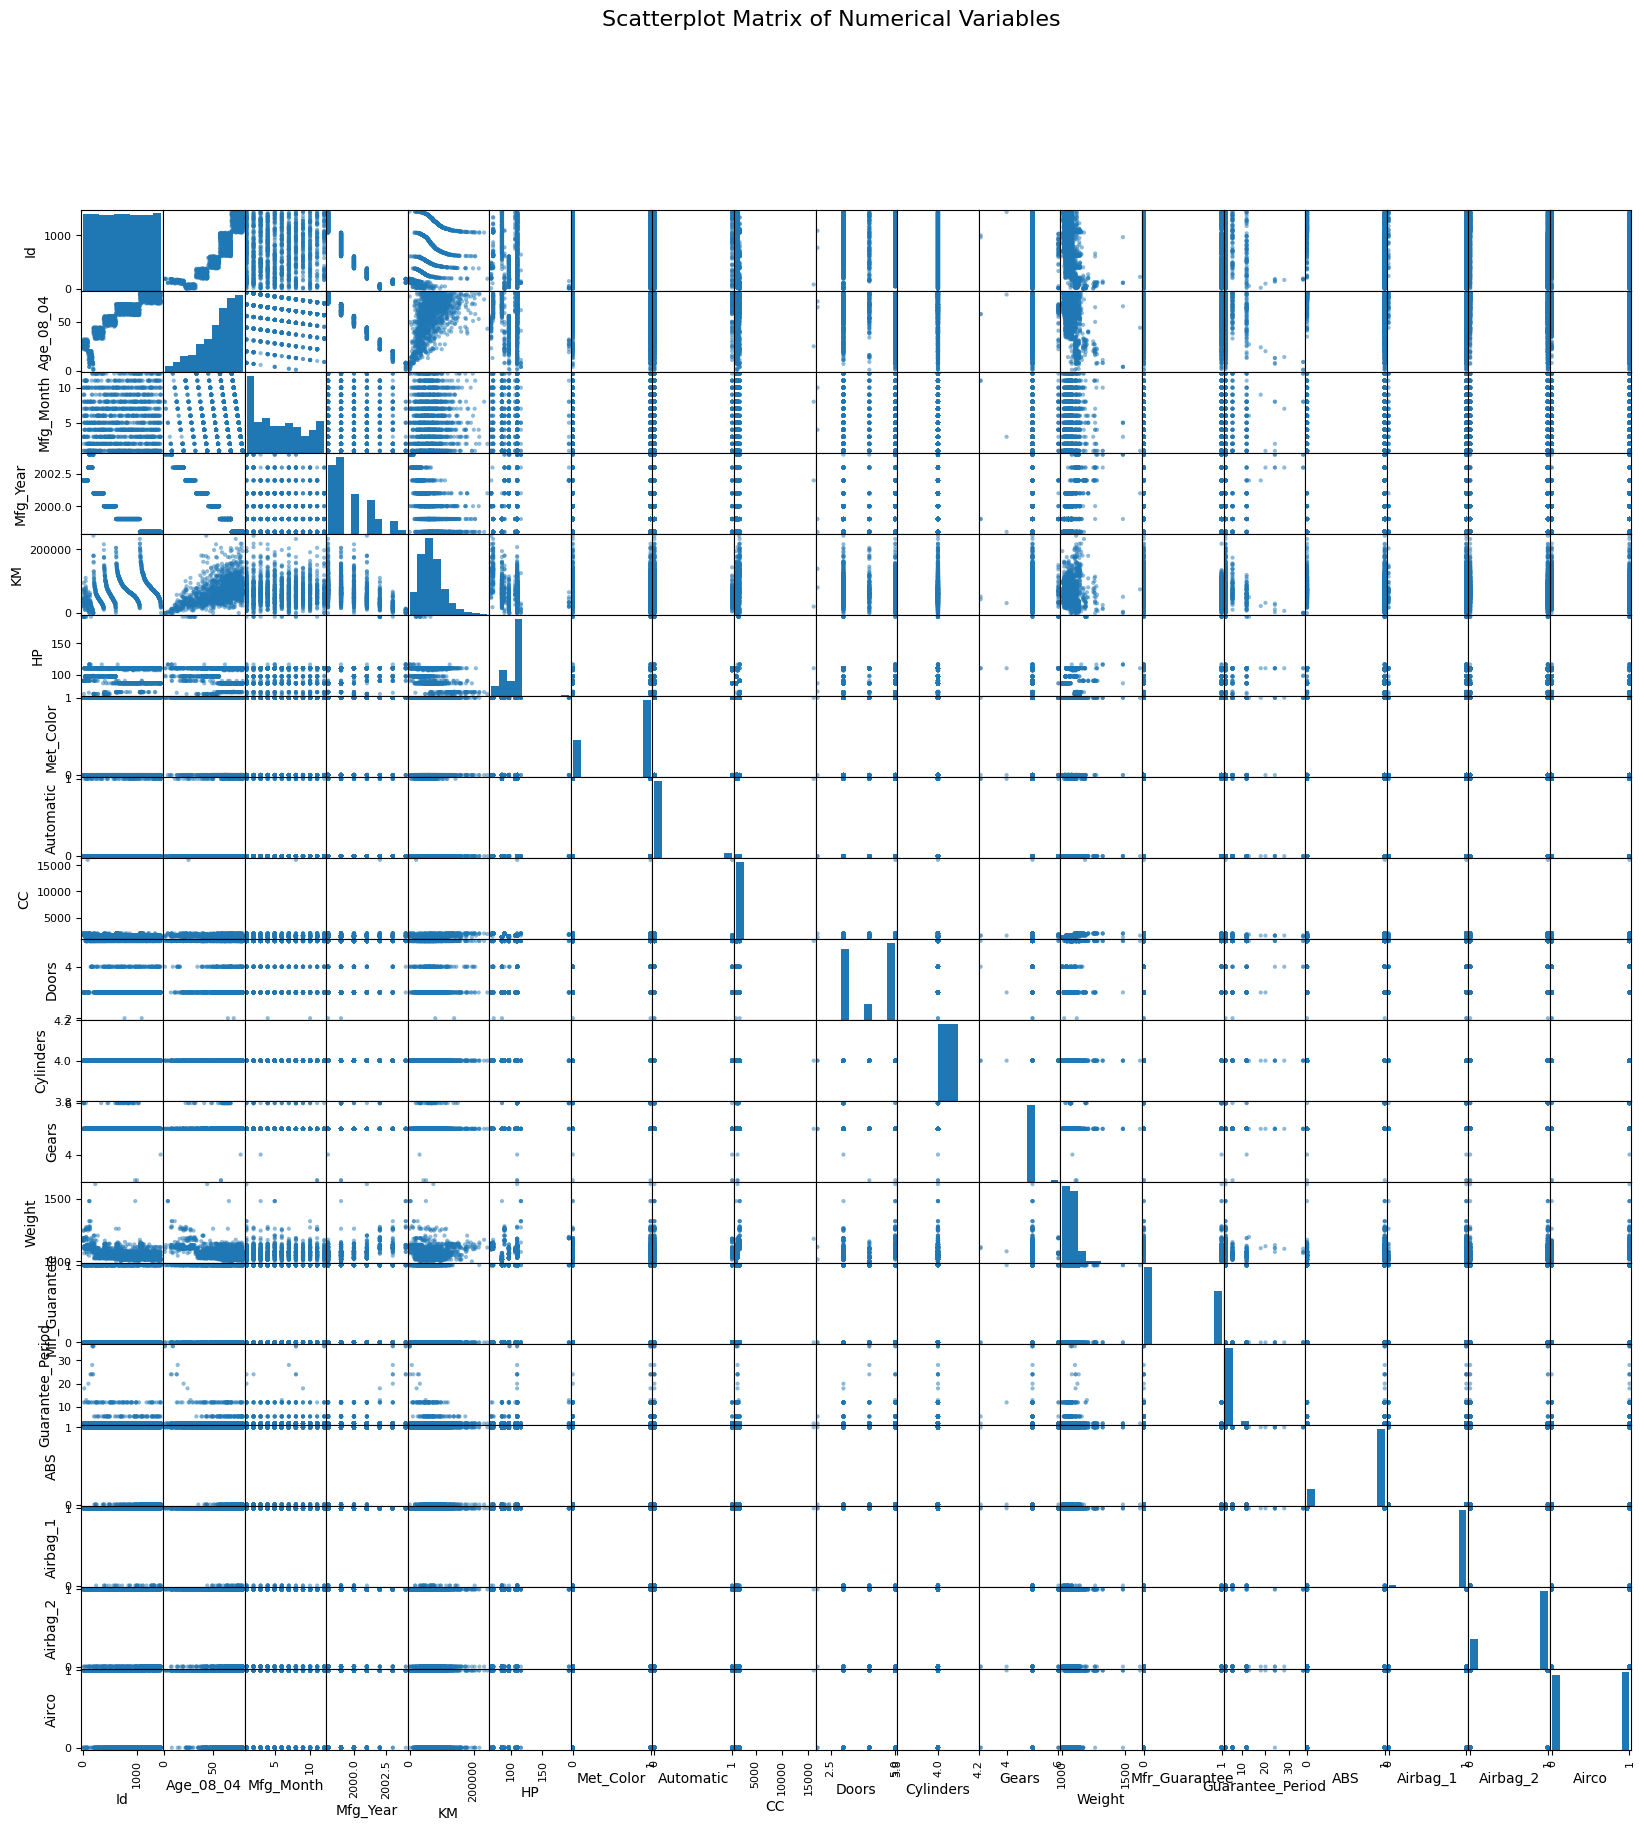

In [ ]:
numerical_data = cars.select_dtypes(include=['int64', 'float64'])

# Create scatterplot matrix
scatter_matrix(numerical_data, figsize=(20, 20))
plt.suptitle('Scatterplot Matrix of Numerical Variables', fontsize=16)
plt.show()

Bringing back the Target Variable

In [ ]:
cars_encoded = pd.concat([cars_encoded, price_target], axis=1)

**Scaling the Predictor Variables**

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

print(cars_encoded.head())

numerical_columns = cars_encoded.select_dtypes(include=['int64', 'float64']).columns

# Scale all numeric columns
cars_encoded[['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Gears', 'Weight', 'Mfr_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Age_Mileage_Ratio', 'Weight_KM_Ratio',
       'Price']] = scaler.fit_transform(cars_encoded[['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Gears', 'Weight', 'Mfr_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Age_Mileage_Ratio', 'Weight_KM_Ratio',
       'Price']])

# Display the updated DataFrame
print(cars_encoded.head())

   Age_08_04     KM  HP  Met_Color  Automatic    CC  Doors  Gears  Weight  \
0         23  46986  90          1          0  2000      3      5    1165   
1         23  72937  90          1          0  2000      3      5    1165   
2         24  41711  90          1          0  2000      3      5    1165   
3         26  48000  90          0          0  2000      3      5    1165   
4         30  38500  90          0          0  2000      3      5    1170   

   Mfr_Guarantee  ...  Color_Green  Color_Grey  Color_Red  Color_Silver  \
0              0  ...        False       False      False         False   
1              0  ...        False       False      False          True   
2              1  ...        False       False      False         False   
3              1  ...        False       False      False         False   
4              1  ...        False       False      False         False   

   Color_Violet  Color_White  Color_Yellow  Age_Mileage_Ratio  \
0         False      

**Splitting the dataset into Training and Test datasets**

In [ ]:
# Define features (X) and target variable (y)
X = cars_encoded.drop(['Price'], axis=1)  # Features
y = cars_encoded['Price']  # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

X_train shape: (1148, 30)
X_test shape: (288, 30)
y_train shape: (1148,)
y_test shape: (288,)
Intercept: 0.3400198822292462
Coefficients: [-0.32634273 -0.14915149  0.0452252  -0.00443061  0.00460974 -0.01011111
 -0.00945782  0.05390235  0.56655398  0.0118733   0.03827936 -0.01427079
  0.02432584 -0.00158424  0.01277095 -0.0136693  -0.01537921  0.02904851
 -0.01652327  0.01087356  0.00357494 -0.00411591  0.00916202  0.00163219
  0.00829568  0.02311947 -0.03481647 -0.00120221 -0.56693733  0.07865691]


Now applying the function to the training data

In [ ]:
# Revised version of the function to handle non-numeric values
def checking_vif(X):
    vif_data = pd.DataFrame()
    numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
    print("IN function", numeric_columns)
    vif_data["Feature"] = numeric_columns
    vif_data["VIF"] = [variance_inflation_factor(X[numeric_columns].values, i) for i in range(len(numeric_columns))]
    return vif_data


vif_data = checking_vif(X_train)
print(vif_data)

IN function Index(['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Gears', 'Weight', 'Mfr_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Age_Mileage_Ratio',
       'Weight_KM_Ratio'],
      dtype='object')
              Feature        VIF
0           Age_08_04  22.518674
1                  KM   7.705902
2                  HP   7.386329
3           Met_Color   3.139000
4           Automatic   1.115824
5                  CC   1.567074
6               Doors   6.221894
7               Gears  52.492347
8              Weight   5.401752
9       Mfr_Guarantee   1.910619
10   Guarantee_Period   1.592739
11                ABS  11.095193
12           Airbag_1  29.169706
13           Airbag_2   8.719249
14              Airco   2.706501
15  Age_Mileage_Ratio   1.792542
16    Weight_KM_Ratio   2.090879


Dropping Columns with VIF Greater Than 10

In [ ]:
# Assuming 'vif_data' contains the VIF results
columns_to_drop = vif_data[vif_data['VIF'] > 10]['Feature']
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

Running the Model Fit

In [ ]:
# Define X_train_sm_array
X_train_sm_array = [[1, 2, 3], [4, 5, 6]]

# Convert X_train_sm_array to a DataFrame
X_train_df = pd.DataFrame(X_train_sm_array)

# Apply one-hot encoding
X_train_sm_encoded = pd.get_dummies(X_train_df)

# Reset indices for X_train_sm_encoded
X_train_sm_encoded.reset_index(drop=True, inplace=True)

# Reset indices for y_train to match X_train_sm_encoded
y_train.reset_index(drop=True, inplace=True)

# Check the indices of y_train and X_train_sm_encoded
print("Indices of y_train:", y_train.index)
print("Indices of X_train_sm_encoded:", X_train_sm_encoded.index)

Indices of y_train: RangeIndex(start=0, stop=1148, step=1)
Indices of X_train_sm_encoded: RangeIndex(start=0, stop=2, step=1)


Using Scikit-Learn

In [ ]:
model_sklearn = Pipeline(steps=[('regressor', LinearRegression())])

try:
    # Fitting the model
    model_sklearn.fit(X_train, y_train)

    # Making predictions
    y_pred = model_sklearn.predict(X_test)

    # Evaluating the model
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

except Exception as e:
    print("An error occurred:", e)

R-squared: 0.6147132215344124
Mean Squared Error: 0.00648744846257702


Regression Analysis and Model Evaluation

In [ ]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model Evaluation
# Check the model assumptions
# 1. Mean of residuals should be 0
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("Mean of Residuals (Train):", np.mean(residuals_train))
print("Mean of Residuals (Test):", np.mean(residuals_test))

Mean of Residuals (Train): 2.5918098484280658e-17
Mean of Residuals (Test): -0.0034869892697597443


No Heteroscedasticity - Visual inspection or statistical tests like Breusch-Pagan test

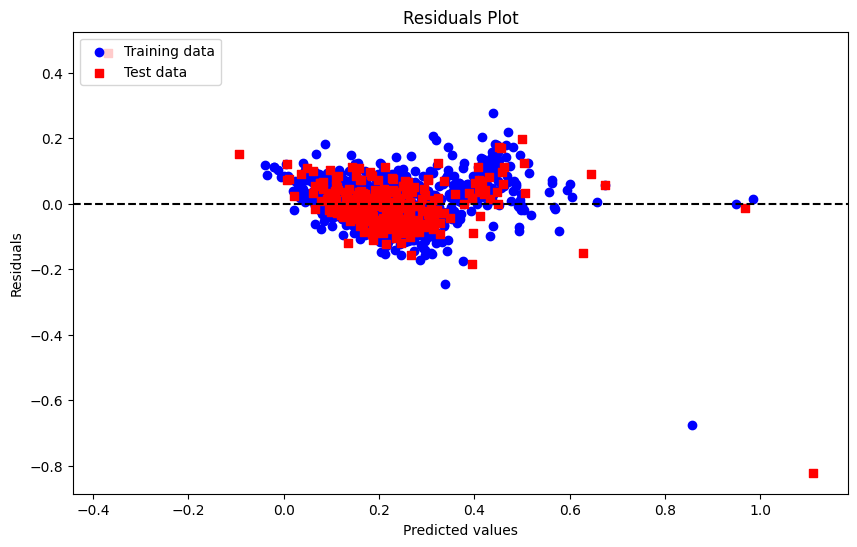

In [ ]:
# Visual inspection of residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, residuals_test, c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residuals Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Linearity of variables - Visual inspection (residuals vs. fitted plot) or statistical tests

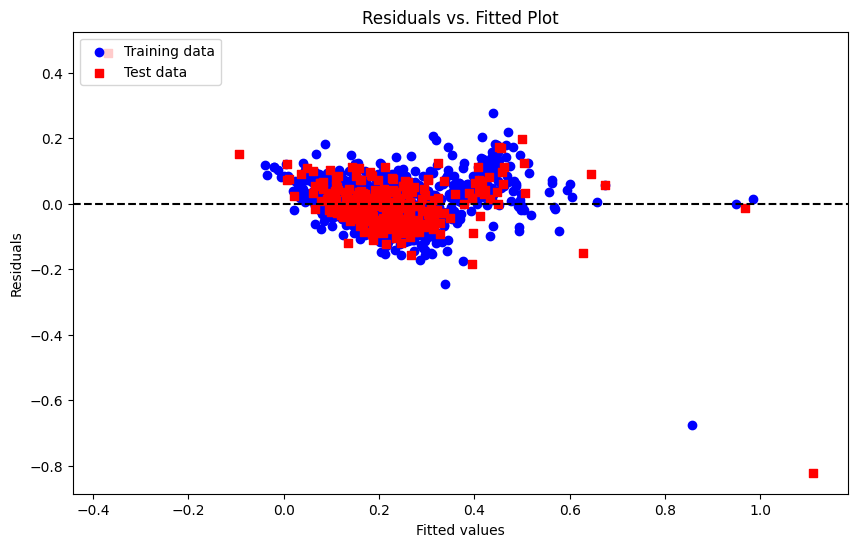

In [ ]:
# Residuals vs. Fitted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, residuals_test, c='red', marker='s', label='Test data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residuals vs. Fitted Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Normality of error terms - Visual inspection (Q-Q plot) or statistical tests like Shapiro-Wilk test

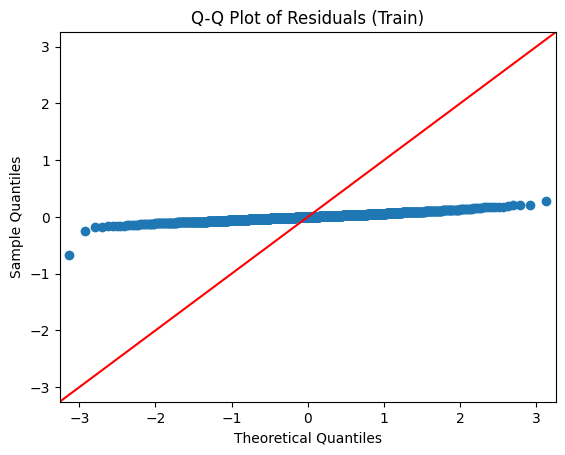

In [ ]:
# Q-Q plot
sm.qqplot(residuals_train, line ='45')
plt.title('Q-Q Plot of Residuals (Train)')
plt.show()

Model Performance

In [ ]:
# Evaluate on train data
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Evaluate on test data
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train R^2:", train_r2)
print("Train RMSE:", train_rmse)
print("Test R^2:", test_r2)
print("Test RMSE:", test_rmse)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Train R^2: 0.748401608617679
Train RMSE: 0.06447678999961858
Test R^2: 0.6147132215344124
Test RMSE: 0.08054469853799827
Intercept: 0.1605236686350272
Coefficients: [-0.36514659 -0.03537759 -0.00111785 -0.02841472 -0.02360889 -0.02115562
  1.00030058  0.01675248  0.18667216  0.03812974  0.04273103  0.01134556
 -0.03777544  0.02642988 -0.02417631  0.00905956  0.00449855 -0.0225132
  0.00689544 -0.00704658  0.01005344  0.02263153 -0.020751    0.02134856
 -0.72322209  0.05147321]


Use cross-validation to improve the model

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # Use 5-fold cross-validation

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Mean Cross-Validation Score:", mean_cv_score)

Mean Cross-Validation Score: -0.03930119241041456


Write the equation of the linear regression model

In [ ]:
print("Linear Regression Equation:")
equation = f"Price = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * {X_train.columns[i]}"
print(equation)

Linear Regression Equation:
Price = 0.16  + -0.37 * KM + -0.04 * HP + -0.00 * Met_Color + -0.03 * Automatic + -0.02 * CC + -0.02 * Doors + 1.00 * Weight + 0.02 * Mfr_Guarantee + 0.19 * Guarantee_Period + 0.04 * Airbag_2 + 0.04 * Airco + 0.01 * Fuel_Type_CNG + -0.04 * Fuel_Type_Diesel + 0.03 * Fuel_Type_Petrol + -0.02 * Color_Beige + 0.01 * Color_Black + 0.00 * Color_Blue + -0.02 * Color_Green + 0.01 * Color_Grey + -0.01 * Color_Red + 0.01 * Color_Silver + 0.02 * Color_Violet + -0.02 * Color_White + 0.02 * Color_Yellow + -0.72 * Age_Mileage_Ratio + 0.05 * Weight_KM_Ratio


Regression tree

In [ ]:
# Initialize the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_reg.fit(X_train, y_train)

# Make predictions
y_train_pred_tree = tree_reg.predict(X_train)
y_test_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
train_rmse_tree = mean_squared_error(y_train, y_train_pred_tree, squared=False)
test_rmse_tree = mean_squared_error(y_test, y_test_pred_tree, squared=False)
train_r2_tree = r2_score(y_train, y_train_pred_tree)
test_r2_tree = r2_score(y_test, y_test_pred_tree)

print("Train RMSE (Decision Tree):", train_rmse_tree)
print("Test RMSE (Decision Tree):", test_rmse_tree)
print("Train R^2 (Decision Tree):", train_r2_tree)
print("Test R^2 (Decision Tree):", test_r2_tree)

Train RMSE (Decision Tree): 2.837722459476931e-18
Test RMSE (Decision Tree): 0.06650100344081099
Train R^2 (Decision Tree): 1.0
Test R^2 (Decision Tree): 0.7373565453743812
